
# Laboratorio 4 Aplicacion de Regularizacion Grupo 1
 <h3>Implementacion de regularizacion a los algoritmos de regresion y clasificacion<h3>
 <HR>
 <h3>
  NOMBRE: Delgadillo LLanos Juan Sebastian <br>
  CARRERA: Ingenieria de Sistemas <BR>
  
  * [Enlace al git hub](https://github.com/sebastianDLL/SIS420_IA/tree/main)
  
  * [Enlace al Colab](https://colab.research.google.com/drive/1wbqBJ6cA-Qm64rZQtNAfwkg9vYewpNQ2?usp=sharing)
 <h3>

La regularización es una técnica utilizada en el aprendizaje automático para evitar el sobreajuste (overfitting) , como la regresión lineal o logística. Consiste en agregar términos adicionales a la función de costo durante el entrenamiento del modelo, los cuales penalizan la complejidad del modelo al restringir los valores de los parámetros, lo que ayuda a prevenir que el modelo se ajuste demasiado a los datos de entrenamiento y, en cambio, fomente la generalización a datos no vistos.

# **1. MULTIVARIABLE**

In [311]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
from matplotlib import pyplot
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

# Conectamos nuestro Drive al Colab
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Cargar datos desde un archivo con el formato especificado
data = np.genfromtxt('/content/gdrive/MyDrive/SIS420/LABORATORIOS/Lab4/Copia de dataset.txt', delimiter=';', skip_header=1)


# Mostrar la cantidad de filas en los datos
print("Cantidad de filas:", len(data))

# Mostrar algunos puntos de datos
print("Mostramos solo 20 datos")
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}'.format('X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'Y'))
print('-'*135)
for i in range(20):  # Mostrar solo los primeros 10 datos
    print('{:8.1f}{:8.1f}{:8.1f}{:8.1f}{:8.1f}{:8.1f}{:10.1f}{:10.1f}{:8.1f}{:8.1f}{:8.1f}{:8.1f}{:8.1f}{:8.1f}'.format(data[i, 0], data[i, 1], data[i, 2], data[i, 3], data[i, 4], data[i, 5], data[i, 6], data[i, 7], data[i, 8], data[i, 9], data[i, 10], data[i, 11], data[i, 12], data[i, 13]))



In [ ]:
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

# Separar las características (X) de la variable objetivo (Y)
X = data[:, :13]
y = data[:, 13]

m = len(data)
# Mostrar la cantidad de filas en los datos
print("Cantidad de filas:",m )

# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

# Mostrar algunos puntos de datos normalizados
print("Mostramos solo 10 datos normalizados")
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}'.format('X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'Y'))
print('-'*115)
for i in range(10):  # Mostrar solo los primeros 20 datos normalizados
    print('{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:10.4f}{:10.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}'.format(X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], X_norm[i, 7], X_norm[i, 8], X_norm[i, 9], X_norm[i, 10], X_norm[i, 11], X_norm[i, 12]))
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)

In [314]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
#print(X)

In [315]:
#SIN REGULARIZACION
#def computeCostMulti(X, y, theta):
#    m = y.shape[0]  # numero de ejemplos de entrenamiento
#    J = 0
#    h = np.dot(X, theta)
#    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
#    return J

# CON REGULARIZACIÓN
def computeCostMultiR(X, y, theta, lambda_):
    m = y.shape[0]  # numero de ejemplos de entrenamiento
    J = 0
    h = np.dot(X, theta)
    reg_term = np.sum(np.square(theta))  # Término de regularización aumentado (sin excluir theta[0])
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y)) + (lambda_ / (2 * m)) * reg_term
    return J

In [318]:
#SIN REGULARIZACION
#def gradientDescentMulti(X, y, theta, alpha, num_iters):
    # alfa => coeficiente de aprendizaje
    # Inicializa algunos valores
 #   m = y.shape[0] # numero de ejemplos de entrenamiento
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
#   theta = theta.copy()

#   J_history = []

#    for i in range(num_iters):
#        theta = theta - (alpha / m) * np.dot(X.T, np.dot(X, theta) - y)
#        J_history.append(computeCostMulti(X, y, theta))


#    return theta, J_history

# CON REGULARIZACIÓN
def gradientDescentMultiR(X, y, theta, alpha, num_iters, lambda_):
    # alfa => coeficiente de aprendizaje
    # Inicializa algunos valores
    m = y.shape[0]  # numero de ejemplos de entrenamiento
    # realiza una copia de theta, el cual será actualizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X.T, np.dot(X, theta) - y) + lambda_ * theta)
        J_history.append(computeCostMultiR(X, y, theta, lambda_))
    return theta, J_history

Con un Costo de = 1.3513585145174112
theta calculado por el descenso por el gradiente: [ 2.40000629e+01 -7.30721961e-02  4.57151007e-01 -3.47313018e-01
 -2.32354347e-01  1.41089159e-02 -3.71552771e-01  7.07680229e-01
 -8.61290095e-01 -1.73713468e-01  6.96345101e-02  1.23774648e+00
  5.26314538e+00  5.66285762e-01]


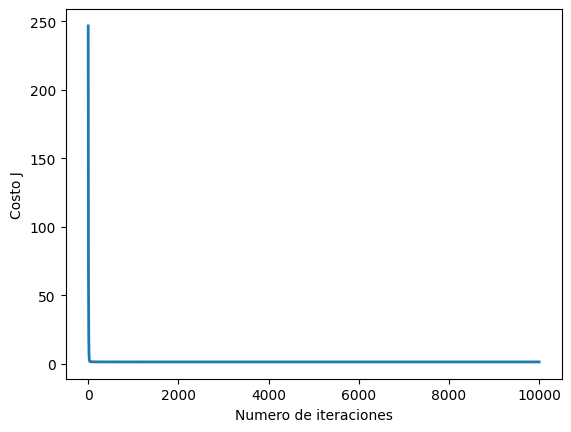

In [321]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.1 # alpha = 0.003
num_iters = 10000
_lambda = 0.01
# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])

#theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
theta, J_history = gradientDescentMultiR(X, y, theta, alpha, num_iters, _lambda)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
print(f"Con un Costo de = {J_history[-1]}")
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# **Resultados**

CON REGULARIZACION COSTO = 1.3513585145174112

SIN REGULARIZACION COSTO = 1.3514170673473953

# ***2. POLINOMIAL***

In [ ]:
# Cargar datos desde un archivo con el formato especificado
data = np.genfromtxt('/content/gdrive/MyDrive/SIS420/LABORATORIOS/Lab4/Copia de dataset.txt', delimiter=';', skip_header=1)


# Mostrar la cantidad de filas en los datos
print("Cantidad de filas:", len(data))

# Mostrar algunos puntos de datos
print("Mostramos solo 20 datos")
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}'.format('X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'Y'))
print('-'*135)
for i in range(20):  # Mostrar solo los primeros 10 datos
    print('{:8.1f}{:8.1f}{:8.1f}{:8.1f}{:8.1f}{:8.1f}{:10.1f}{:10.1f}{:8.1f}{:8.1f}{:8.1f}{:8.1f}{:8.1f}{:8.1f}'.format(data[i, 0], data[i, 1], data[i, 2], data[i, 3], data[i, 4], data[i, 5], data[i, 6], data[i, 7], data[i, 8], data[i, 9], data[i, 10], data[i, 11], data[i, 12], data[i, 13]))


In [ ]:
# Separar las características (X) de la variable objetivo (Y)
X = data[:, :13]
y = data[:, 13]

m = len(data)
# Mostrar la cantidad de filas en los datos
print("Cantidad de filas:",m )

# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

# Mostrar algunos puntos de datos normalizados
print("Mostramos solo 10 datos normalizados")
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}'.format('X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'Y'))
print('-'*115)
for i in range(10):  # Mostrar solo los primeros 20 datos normalizados
    print('{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:10.4f}{:10.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}'.format(X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], X_norm[i, 7], X_norm[i, 8], X_norm[i, 9], X_norm[i, 10], X_norm[i, 11], X_norm[i, 12]))
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)

In [339]:
def featureNormalize(X):
  X_norm = X.copy()
  mu = np.zeros(X.shape[1]) # promedio, media
  sigma = np.zeros(X.shape[1])  # desviasión estandar

  mu = np.mean(X, axis=0)
  sigma = np.std(X, axis=0)
  X_norm = (X - mu) / sigma

  return X_norm, mu, sigma

# Llamar a la funcion de normalización con los datos cargados
X_norm, mu, sigma = featureNormalize(X)
# Columna de unos para X0
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [340]:
#SIN REGULARIZACION
def computeCostMulti(X, y, theta):
    m = y.shape[0]  # numero de ejemplos de entrenamiento
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

# CON REGULARIZACIÓN
#def computeCostMultiR(X, y, theta, lambda_):
#    m = y.shape[0]  # numero de ejemplos de entrenamiento
#    J = 0
#    h = np.dot(X, theta)
#    reg_term = np.sum(np.square(theta))  # Término de regularización aumentado (sin excluir theta[0])
#    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y)) + (lambda_ / (2 * m)) * reg_term
#    return J

In [341]:
#SIN REGULARIZACION
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    # alfa => coeficiente de aprendizaje
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * np.dot(X.T, np.dot(X, theta) - y)
        J_history.append(computeCostMulti(X, y, theta))


    return theta, J_history

# CON REGULARIZACIÓN
#def gradientDescentMultiR(X, y, theta, alpha, num_iters, lambda_):
    # alfa => coeficiente de aprendizaje
    # Inicializa algunos valores
#    m = y.shape[0]  # numero de ejemplos de entrenamiento
    # realiza una copia de theta, el cual será actualizada por el descenso por el gradiente
#    theta = theta.copy()
#    J_history = []
#    for i in range(num_iters):
#        theta = theta - (alpha / m) * (np.dot(X.T, np.dot(X, theta) - y) + lambda_ * theta)
#        J_history.append(computeCostMultiR(X, y, theta, lambda_))
#    return theta, J_history

Con un Costo de = 1.3521225207974432
theta calculado por el descenso por el gradiente: [24.00008571 -0.07220437  0.45794778 -0.34849211 -0.24282136  0.06976156
 -0.44241185  0.63728395 -0.7870518  -0.16862475  0.06887809  1.39180356
  5.14506079  0.52456119]


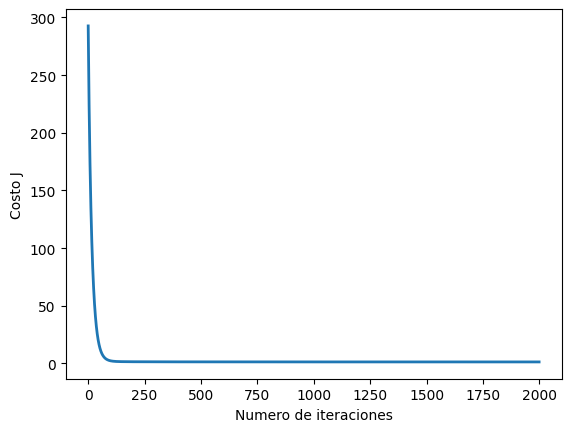

In [342]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.03 # alpha = 0.003
num_iters = 2000
#_lambda = 0.01
# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
#theta, J_history = gradientDescentMultiR(X, y, theta, alpha, num_iters, _lambda)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
print(f"Con un Costo de = {J_history[-1]}")
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# **Resultados**

CON REGULARIZACION COSTO = 1.3524115926121596

SIN REGULARIZACION COSTO = 1.3521225207974432

# ***ECUACION DE LA NORMAL***

In [348]:
# Importación de librerías
import numpy as np
import pandas as pd

# Carga de datos desde un archivo con formato especificado
data = np.genfromtxt('/content/gdrive/MyDrive/SIS420/LABORATORIOS/Lab4/Copia de dataset.txt', delimiter=';', skip_header=1)

# Separación de las características y la variable objetivo
X = data[:, :13]
y = data[:, 13]

# Conversión de la variable objetivo a tipo float
y = y.astype(float)

# Adición de una columna de unos a la matriz de características
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [349]:
# Definición de la función para calcular los parámetros con la ecuación de la normal
#SIN REGULARIZACION
#def normalEqn(X, y):
#  theta = np.zeros(X.shape[1])
#  theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
#  return theta

# Cálculo de los parámetros con la ecuación de la normal
#theta = normalEqn(X, y)

#Visualización de los resultados
#print('Theta calculado a partir de la ecuación de la normal:')
#print(theta)

#CON REGULARIZACION
def normalEqnReg(X, y, lambda_):
    m = y.shape[0]
    n = X.shape[1]

    # Crea la matriz identidad de dimensión (n+1) x (n+1)
    I = np.eye(n)

    # Asigna 0 a la primera fila y columna de la matriz identidad
    I = np.vstack((np.zeros((1, n)), I))
    I = np.column_stack((np.zeros((n+1, 1)), I))

    # Calcula la ecuación normal regularizada
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lambda_ * I), X.T), y)

    return theta

In [350]:
# Datos para predecir
data_new = np.array([
    [1, 0, 33, 20, 13, 46, 23, 1022.9, 1019.8, 0, 0, 20.6, 29.1, 9.9],
    [1, 0, 28, 13, 11, 38, 19, 1020.4, 1015.2, 0, 0, 24.7, 33, 15.6],
    [1, 0, 44, 9, 30, 47, 15, 1013.9, 1009.3, 0, 0, 25.8, 34.8, 15.1],
    [1, 0, 54, 9, 7, 62, 93, 1004, 1002.3, 1, 8, 22.9, 18.3, 21.5],
    [1, 29.4, 56, 20, 28, 90, 60, 1000.8, 1001.3, 8, 6, 10.1, 14.6, 10.1],
    [1, 3.2, 43, 11, 22, 62, 32, 1015.4, 1015.9, 0, 2, 11.8, 19.4, 5.8],
    [1, 0, 44, 7, 13, 63, 28, 1020.9, 1018.3, 0, 0, 15.5, 24.8, 7.7],
    [1, 0, 31, 9, 13, 55, 20, 1016.7, 1011.3, 0, 0, 18.4, 30.4, 10.2],
    [1, 0, 50, 6, 22, 56, 31, 1006.2, 1001.4, 0, 1, 22.1, 29.2, 18.1],
    [1, 3.2, 35, 7, 7, 68, 36, 1014.6, 1012.2, 0, 8, 18, 27.2, 12]
])

# Calcular las predicciones
y_pred = np.dot(data_new, theta)

# Visualizar las predicciones
print('Predicciones de temperatura máxima para las nuevas características:')
for i, pred in enumerate(y_pred, start=1):
    print(f'Predicción {i}: {pred.round(2)}')


Predicciones de temperatura máxima para las nuevas características:
Predicción 1: 54.85
Predicción 2: 87.48
Predicción 3: 105.02
Predicción 4: -4.27
Predicción 5: -43.26
Predicción 6: -8.6
Predicción 7: 32.92
Predicción 8: 66.24
Predicción 9: 73.3
Predicción 10: 46.25


# REGRESION LOGISTICA

In [360]:
#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

#Haciendo uso de la libreria pandas para leer el dataset.
dataset = pd.read_csv('/content/gdrive/MyDrive/SIS420/LABORATORIOS/Lab4/Copia de diabetes2 .csv', delimiter=',')

#Imprimimos en una tabla el dataset.
dataset

,PA alta,col alta,control de col,IMC,fumador,acc. cerebrovascular,enfermedad cardíaca,actividad física,frutas,verduras,...,Falta de atencion por Dinero,salud general,salud mental,salud física,caminata,sexo,edad,educación,ingresos,Diabetes
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,14.0,0.0,0.0,12.0,5.0,5.0,0.0
24996,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,1.0,4.0,5.0,0.0
24997,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,10.0,6.0,6.0,0.0
24998,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,1.0,0.0,1.0,8.0,6.0,8.0,0.0


In [ ]:
# Separar el conjunto de datos en conjuntos de entrenamiento y prueba
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

# Separar los conjuntos de características (X) y las etiquetas (y) para el conjunto de prueba
X_test = test_dataset.drop(['Diabetes'], axis=1).values
y_test = test_dataset['Diabetes'].values

# Separar los conjuntos de características (X) y las etiquetas (y) para el conjunto de entrenamiento
X_train = train_dataset.drop(['Diabetes'], axis=1).values
y_train = train_dataset['Diabetes'].values

# Calcular el número de ejemplos de entrenamiento
m_train = len(y_train)

# Imprimir algunos ejemplos de los datos de entrenamiento
print('{:>8s}{:>8s}{:>14s}{:>8s}{:>8s}{:>18s}{:>20s}{:>16s}{:>8s}{:>8s}{:>10s}{:>12s}{:>18s}{:>14s}{:>12s}{:>10s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>10s}'.format(
    'PA alta', 'col alta', 'control de col', 'IMC', 'fumador', 'acc. cerebrovascular', 'enfermedad cardíaca', 'actividad física', 'frutas', 'verduras', 'alcohol', 'atencion medica', 'Falta de atencion por Dinero', 'salud general', 'salud mental', 'salud física', 'caminata', 'sexo', 'edad', 'educación', 'ingresos', 'Y'
))

print('-' * 280)


for i in range(10):
    print('{:8.0f}{:8.0f}{:14.0f}{:8.0f}{:8.0f}{:18.0f}{:20.0f}{:16.0f}{:8.0f}{:8.0f}{:10.0f}{:12.0f}{:18.0f}{:14.0f}{:12.0f}{:10.0f}{:10.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:10.0f}'.format(
        X_train[i, 0], X_train[i, 1], X_train[i, 2], X_train[i, 3], X_train[i, 4], X_train[i, 5], X_train[i, 6], X_train[i, 7], X_train[i, 8], X_train[i, 9], X_train[i, 10], X_train[i, 11], X_train[i, 12], X_train[i, 13], X_train[i, 14], X_train[i, 15], X_train[i, 16], X_train[i, 17], X_train[i, 18], X_train[i, 19], X_train[i, 20], y_train[i]
    ))

# Imprimir la cantidad de ejemplos de entrenamiento y prueba
print(" ")
print('El 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} de ejemplos'.format(len(train_dataset)))
print('El 20% de ejemplos para pruebas son la cantidad de: {:.0f} de ejemplos'.format(len(test_dataset)))

In [362]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X_train)
# imprimir todos las X_norm de datos solo 20
print('{:>8s}{:>8s}{:>14s}{:>8s}{:>8s}{:>18s}{:>20s}{:>16s}{:>8s}{:>8s}{:>10s}{:>12s}{:>18s}{:>14s}{:>12s}{:>10s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}'.format(
    'PA alta', 'col alta', 'control de col', 'IMC', 'fumador', 'acc. cerebrovascular', 'enfermedad cardíaca', 'actividad física', 'frutas', 'verduras', 'alcohol', 'atencion medica', 'Falta de atencion por Dinero', 'salud general', 'salud mental', 'salud física', 'caminata', 'sexo', 'edad', 'educación', 'ingresos'
))

print('-' * 280)


for i in range(20):
    print('{:8.0f}{:8.0f}{:14.0f}{:8.0f}{:8.0f}{:18.0f}{:20.0f}{:16.0f}{:8.0f}{:8.0f}{:10.0f}{:12.0f}{:18.0f}{:14.0f}{:12.0f}{:10.0f}{:10.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}'.format(
        X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], X_norm[i, 7], X_norm[i, 8], X_norm[i, 9], X_norm[i, 10], X_norm[i, 11], X_norm[i, 12], X_norm[i, 13], X_norm[i, 14], X_norm[i, 15], X_norm[i, 16], X_norm[i, 17], X_norm[i, 18], X_norm[i, 19], X_norm[i, 20]
    ))

In [364]:
X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)

def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [365]:
#SIN REGULARIZACION
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

#CON REGULARIZACION
#def calcularCostoR(theta, X, y,lambda_):
    # Inicializar algunos valores utiles
#    m = y.size  # numero de ejemplos de entrenamiento

#    J = 0
#    h = sigmoid(X.dot(theta.T))
#    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))

#    return J

In [366]:
#SIN REGULARIZACION
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

#CON REGULARIZACION
#def descensoGradienteR(theta, X, y, alpha, num_iters, lambda_):
    # Inicializa algunos valores
#    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será actualizada por el descenso por el gradiente
#    theta = theta.copy()
#    J_history = []

#    for i in range(num_iters):
#        h = sigmoid(X.dot(theta.T))
#        theta_reg = np.copy(theta)
#        theta_reg[0] = 0  # No regularizar el parámetro theta[0]

        # Actualizar theta, incluyendo términos de regularización
#        gradient = (1 / m) * np.dot(X.T, (h - y))
#        regularized_term = (lambda_ / m) * theta_reg
#        theta = theta - alpha * (gradient + regularized_term)

#        J_history.append(calcularCostoR(theta, X, y, lambda_))
#    return theta, J_history


theta calculado por el descenso por el gradiente:
Theta 0: -2.149808043887385
Theta 1: 0.32032479098126426
Theta 2: 0.24419569557514
Theta 3: 0.15134707868409927
Theta 4: 0.3730902233666204
Theta 5: 0.00209376511209058
Theta 6: 0.031403842095640344
Theta 7: 0.06813067817588052
Theta 8: 0.010351390316736087
Theta 9: -0.011094390027640646
Theta 10: -0.02337043643683042
Theta 11: -0.15656012168181505
Theta 12: 0.014287013800047843
Theta 13: 0.00010955158918926137
Theta 14: 0.44948630321390026
Theta 15: -0.031807206755408636
Theta 16: -0.03180360360421474
Theta 17: 0.04851016439743906
Theta 18: 0.09939678527925522
Theta 19: 0.32095670088460704
Theta 20: -0.05844213126725916
Theta 21: -0.11797060125133202
########################################################################################################
con un costo de: 0.3267662616900156 


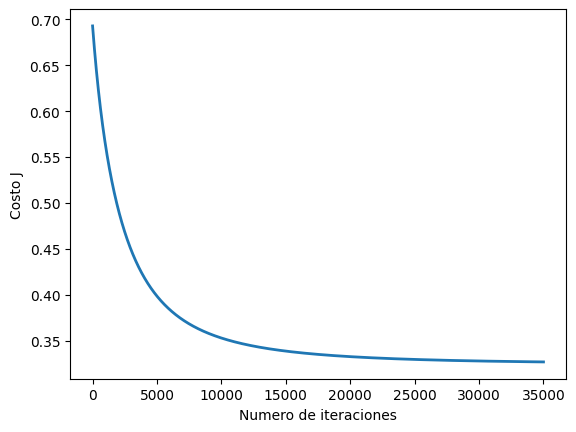

In [367]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 35000
#lambda_ = 0.1
# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(22)
theta, J_history = descensoGradiente(theta, X_ready, y_train, alpha, num_iters)
#theta, J_history = descensoGradienteR(theta, X_ready, y_train, alpha, num_iters, lambda_)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente:')
for i in range(len(theta)):
    print(f'Theta {i}: {theta[i]}')


print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_history[-1]} ")


In [368]:
X_norm_test = (X_test- mu) / sigma
m_test= len(X_test)
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_norm_test], axis=1)
y_predicha =[]
# Calculamos la Y predicha de cada fila de la matriz
for dato in X_test_ready:
    y_predicha.append(sigmoid(np.dot(dato, theta)))

# Convertimos la lista a un array unidimensional
y_predicha = np.array(y_predicha)

#usando el umbral donde todo aquello que sea >= 0.5 sera 1, y si es menor sera 0
y_umbral = (y_predicha >= 0.5).astype(int)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(y_umbral == y_test) * 100))

Precisión de entrenamiento: 86.52 %


# **Resultados**

CON REGULARIZACION COSTO = 0.32676835519658015  86.52 %

SIN REGULARIZACION COSTO = 0.3267662616900156  86.52 %

# REGRESION LOGISTICA MULTICLASE

In [ ]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

from sklearn.model_selection import train_test_split

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

import pandas as pd

# La entrada es de 13 elementos (total)
input_layer_size  = 13
#clases o salidas de y + 1
num_labels = 4

#Haciendo uso de la libreria pandas para leer el dataset.
data = pd.read_csv('/content/gdrive/MyDrive/SIS420/LABORATORIOS/Lab4/Copia de Score.csv', delimiter=';')

#Imprimimos en una tabla el dataset.
data

#CONVERTIMOS NUESTRAS (Y) A VALORES NUMERICOS

# Definir un diccionario de mapeo de etiquetas literales a enteros
label_mapping = {'Good': 2, 'Standard': 1, 'Poor': 0}

# Mapear las etiquetas literales a enteros
data['Credit_Score'] = data['Credit_Score'].map(label_mapping)

# Verificar que se haya realizado correctamente
data


In [ ]:
# Separar el conjunto de datos en conjuntos de entrenamiento y prueba
train_dataset, test_dataset = train_test_split(data, test_size=0.2, random_state=42)

# Separar los conjuntos de características (X) y las etiquetas (y) para el conjunto de prueba
X_test = test_dataset.drop(['Credit_Score'], axis=1)
y_test = test_dataset['Credit_Score']

# Separar los conjuntos de características (X) y las etiquetas (y) para el conjunto de entrenamiento
X_train = train_dataset.drop(['Credit_Score'], axis=1)
y_train = train_dataset['Credit_Score']

# Calcular el número de ejemplos de entrenamiento
m_train = len(y_train)

print(X_train)
print(y_train)

# Imprimir la cantidad de ejemplos de entrenamiento y prueba
print(" ")
print('El 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} de ejemplos'.format(len(train_dataset)))
print('El 20% de ejemplos para pruebas son la cantidad de: {:.0f} de ejemplos'.format(len(test_dataset)))

In [ ]:
# Imprimir las características (X) de un ejemplo específico
print("Características (X) del primer ejemplo:")
print(X_train.iloc[0, :])  # Esto imprimirá todas las características del primer ejemplo en X_train

# Imprimir la etiqueta (y) correspondiente al primer ejemplo
print("Etiqueta (y) del primer ejemplo:")
print(y_train.iloc[0])  # Esto imprimirá la etiqueta del primer ejemplo en y_train

In [388]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [389]:
# Limpiar los valores de la columna Annual_Income
X_train['Annual_Income'] = X_train['Annual_Income'].str.replace(',', '').astype(float)

# Calcular la media de la columna Annual_Income
mean_annual_income = X_train['Annual_Income'].mean()

# Imputar los valores faltantes con la media
X_train['Annual_Income'].fillna(mean_annual_income, inplace=True)

# Llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X_train)



In [390]:
# Obtener las dimensiones de la matriz de características X_train
m, n = X_train.shape

# X_train ya ha sido normalizado previamente, por lo que simplemente asignamos la versión normalizada a X_train
X_train = X_norm

# Las dimensiones de la matriz de características X_train se utilizan en el proceso de entrenamiento del modelo
# m representa el número de ejemplos de entrenamiento
# n representa el número de características
# Al asignar X_norm a X_train, nos aseguramos de que los datos de entrenamiento estén normalizados y listos para su uso en el modelo
# Seleccionar aleatoriamente 100 puntos de datos para mostrar
# Se utiliza np.random.choice para seleccionar aleatoriamente 100 índices de entre 0 y m-1, sin reemplazo
# donde m es el número total de ejemplos de entrenamiento
rand_indices = np.random.choice(m, 100, replace=False)

# Seleccionar las filas correspondientes a los índices aleatorios de X_train
# Utilizamos iloc para acceder a las filas utilizando los índices seleccionados aleatoriamente
sel = X_train.iloc[rand_indices, :]

# La variable 'sel' ahora contiene 100 ejemplos de datos de entrenamiento seleccionados aleatoriamente

In [396]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)
    g = 1 / (1 + np.exp(-z))
    return g


In [397]:
def lrCostFunction(theta, X, y, lambda_):
    """
    Calcula el costo de usar theta como parámetro para la regresión logística regularizada y
    el gradiente del costo w.r.t. a los parámetros.

    Parametros
    ----------
    theta : array_like
        Parametro theta de la regresion logistica. Vector de la forma(shape) (n, ). n es el numero de caracteristicas
        incluida la intercepcion

    X : array_like
        Dataset con la forma(shape) (m x n). m es el numero de ejemplos, y n es el numero de
        caracteristicas (incluida la intercepcion).

    y : array_like
        El conjunto de etiquetas. Un vector con la forma (shape) (m, ). m es el numero de ejemplos

    lambda_ : float
        Parametro de regularización.

    Devuelve
    -------
    J : float
        El valor calculado para la funcion de costo regularizada.

    grad : array_like
        Un vector de la forma (shape) (n, ) que es el gradiente de la
        función de costo con respecto a theta, en los valores actuales de theta..
    """
    # Inicializa algunos valores útiles
    m = y.size

    # Calcula la hipótesis
    h = sigmoid(X.dot(theta.T))

    # Calcula el costo sin regularización
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    # Calcula el término de regularización
    reg_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))

    # Calcula el costo regularizado
    J += reg_term

    # Calcula el gradiente sin regularización
    grad = (1 / m) * (h - y).dot(X)

    # Inicializa el gradiente regularizado
    grad_reg = np.zeros_like(grad)

    # Calcula el gradiente regularizado
    grad_reg[0] = grad[0]
    grad_reg[1:] = grad[1:] + (lambda_ / m) * theta[1:]

    return J, grad_reg


In [398]:
def oneVsAll(X, y, num_labels, lambda_):
    """
    Trains num_labels logistic regression classifiers and returns
    each of these classifiers in a matrix all_theta, where the i-th
    row of all_theta corresponds to the classifier for label i.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). m is the number of
        data points, and n is the number of features. Note that we
        do not assume that the intercept term (or bias) is in X, however
        we provide the code below to add the bias term to X.

    y : array_like
        The data labels. A vector of shape (m, ).

    num_labels : int
        Number of possible labels.

    lambda_ : float
        The logistic regularization parameter.

    Returns
    -------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        (ie. `numlabels`) and n is number of features without the bias.
    """
    # algunas variables utiles
    m, n = X.shape

    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)

        all_theta[c] = res.x

    return all_theta

In [399]:
# Definir el parámetro de regularización lambda
lambda_ = 0.1

# Aplicar el enfoque de uno contra todos para entrenar el clasificador
# La función oneVsAll entrenará un clasificador para cada clase en el conjunto de datos
# y devolverá los parámetros theta (pesos) correspondientes a cada clase
all_theta = oneVsAll(X_train, y_train, num_labels, lambda_)

# Imprimir la forma de la matriz de parámetros theta
print(all_theta.shape)


(4, 13)


In [400]:
print(all_theta)

[[-1.12093218e+00  2.38024427e-01 -1.69627369e-01  3.42194669e-01
  -1.83583772e-01 -1.47982381e-02  3.62474578e-02  2.94468220e-02
   3.63677205e-01  4.40430461e-01  3.20220479e-02 -5.17025897e-01
   2.20034635e-01]
 [ 1.35468584e-01 -1.09853656e-01  3.17198759e-01 -2.24956228e-01
  -1.53511177e-02 -3.39873170e-02  1.67090570e-02  1.31523588e-01
  -2.80682081e-02 -1.19289316e-01 -7.77810153e-02  5.77877776e-01
  -4.54815233e-01]
 [-2.57053973e+00 -5.54687266e-01 -1.66984054e-01 -1.92916672e-01
   2.57898930e-01  8.15525771e-02 -5.70919505e-02 -1.41299399e-01
  -5.20062621e-01 -7.17751290e-01  3.55369552e-05 -2.66113240e-01
   3.18175468e-02]
 [-1.24380805e+01 -7.90596957e-11 -7.68096900e-11 -8.39631347e-11
   8.17211562e-11  3.50576188e-11  1.83972738e-12 -7.79647411e-11
  -6.77350077e-11 -8.61038528e-11 -8.03760505e-11 -5.86412698e-11
  -8.60900303e-11]]


In [401]:
def predictOneVsAll(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas.
    all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase.
    Debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1]
    predice clases 0, 2, 0, 1 para 4 ejemplos).

    Parametros
    ----------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        and n is number of features without the bias.

    X : array_like
        Data points to predict their labels. This is a matrix of shape
        (m x n) where m is number of data points to predict, and n is number
        of features without the bias term. Note we add the bias term for X in
        this function.

    Devuelve
    -------
    p : array_like
        The predictions for each data point in X. This is a vector of shape (m, ).
    """

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

In [402]:
# Imprime la forma de la matriz de características X_train
print(X_train.shape)

# Utiliza los parámetros all_theta para predecir las etiquetas de clase para el conjunto de entrenamiento X_train
pred = predictOneVsAll(all_theta, X_train)

# Calcula la precisión del conjunto de entrenamiento comparando las predicciones con las etiquetas verdaderas
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y_train) * 100))

# Crea una copia del subconjunto de características X_train llamado XPrueba seleccionando las filas de la 10 a la 150
XPrueba = X_train.iloc[10:150, :].copy()

# Imprime la forma de la matriz XPrueba
print(XPrueba.shape)

# Añade una columna de unos a la matriz XPrueba para considerar el término de sesgo
XPrueba = np.concatenate([np.ones((140, 1)), XPrueba], axis=1)

# Utiliza los parámetros all_theta para predecir las etiquetas de clase para el conjunto XPrueba
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis=1)
print(p)

# Imprime las etiquetas verdaderas del conjunto de entrenamiento, seleccionando las filas de la 10 a la 150
print(y_train.iloc[10:150])


(20239, 12)
Precision del conjuto de entrenamiento: 63.04%
(140, 12)
[1 1 1 1 0 1 1 1 1 0 1 2 0 1 1 0 0 1 0 1 2 1 1 1 2 2 1 1 2 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 2 2 1 1 1 1 1 1 2 1 1 2 0 1 0
 1 0 1 1 1 0 1 2 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1
 2 0 1 0 0 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
24822    1
5199     1
11522    2
8375     2
6224     0
        ..
8403     1
13681    1
18272    1
18181    0
10434    1
Name: Credit_Score, Length: 140, dtype: int64


In [ ]:
print("Forma de X:", X_test.shape)
print("Forma de all_theta:", all_theta.shape)
#vemos informacion de el conjunto de X para pruebas
print(X_test.info())
X_test['Annual_Income'] = pd.to_numeric(X_test['Annual_Income'], errors='coerce')
#FALTA NORMALIZAR
X_norm_test = (X_test- mu) / sigma

m_test= len(X_test)
X_norm_test

In [404]:
print(X_test.shape)
# Llama a la función predictOneVsAll con los datos de prueba
pred = predictOneVsAll(all_theta, X_norm_test)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y_test) * 100))
XPrueba = X_norm_test.iloc[10:450, :].copy()
print(XPrueba.shape)
#print(np.ones((1)))
#print(XPrueba)
#p = np.zeros(1)
XPrueba = np.concatenate([np.ones((440, 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p)

# displayData(X[1002:1003, :])
y_test[10:450]

(5060, 12)
Precision del conjuto de entrenamiento: 58.54%
(440, 12)
(440, 13)
[2 1 1 0 0 1 1 2 0 1 1 2 0 0 0 0 2 1 0 0 1 1 1 1 2 0 1 1 1 1 0 1 1 0 2 1 2
 1 1 1 0 1 0 1 2 0 2 1 1 1 0 1 0 1 0 1 0 2 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 2 0 2 0 1 1 1 0 2 1 0 0 2 1 2 1 1 1 0 0 0 1 1 0 0 1 0 1 1 2 1 0 1 2
 0 1 0 1 1 2 1 0 2 1 0 0 1 0 1 1 0 2 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0
 1 1 1 0 0 0 1 0 0 2 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 2 0 1 1
 1 1 0 1 1 1 0 0 0 1 2 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1
 0 0 0 0 0 0 0 2 1 2 1 1 0 2 1 1 1 1 1 1 0 1 2 1 1 1 1 0 1 1 1 1 1 0 1 1 2
 1 0 1 1 2 1 1 1 0 0 2 0 1 2 1 1 1 1 1 0 1 0 2 1 1 1 1 0 0 1 1 1 0 1 1 1 1
 0 1 0 1 2 0 1 0 0 1 2 2 1 0 0 2 1 1 1 1 1 1 0 0 0 1 1 0 0 2 1 1 1 1 1 0 0
 1 0 2 1 1 1 2 1 0 1 1 1 2 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 2 2
 1 1 0 2 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0
 1 0 1 1 2 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1]


6275     1
11838    0
7481     1
5325     1
4834     1
        ..
23844    1
5050     2
13745    2
10119    2
19165    1
Name: Credit_Score, Length: 440, dtype: int64